In [1]:
from tkinter import font
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist
#创建画布
def Draw():
    fig = plt.figure(figsize=(7.32, 4.5))
    #使用axisartist.Subplot方法创建一个绘图区对象ax
    ax = axisartist.Subplot(fig, 111)  
    #将绘图区对象添加到画布中
    fig.add_axes(ax)
    #通过set_visible方法设置绘图区所有坐标轴隐藏
    ax.axis[:].set_visible(True)
    #ax.new_floating_axis代表添加新的坐标轴
    ax.axis["x"] = ax.new_floating_axis(0,0)
    #给x坐标轴加上箭头
    ax.axis["x"].set_axisline_style("->", size = 3.0)
    #添加y坐标轴，且加上箭头
    ax.axis["y"] = ax.new_floating_axis(1,0)
    ax.axis["y"].set_axisline_style("->", size = 3.0)
    #设置x、y轴上刻度显示方向
    ax.axis["x"].set_axis_direction("bottom")
    ax.axis["y"].set_axis_direction("right")
    font = {'family' : 'Times New Roman',"weight" : "normal","size"   : 18}
    
    
#生成x步长为0.1的列表数据

In [2]:
t = symbols('t')
y=Symbol('y')
f=Symbol('f')
n=Symbol('n')
#频截为50hz，频谱为三角
fm=50
X=Piecewise(((1-abs(f/fm)),abs(f)<fm), (0, True))

In [3]:
X

Piecewise((1 - Abs(f)/50, Abs(f) < 50), (0, True))

Text(0.57, 1.05, '$X(f)$')

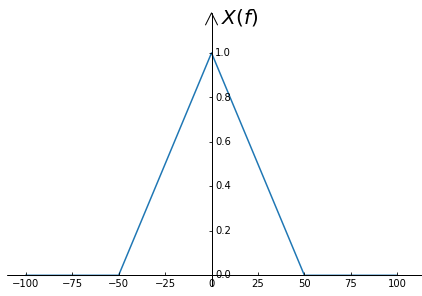

In [4]:
Draw()
v=np.arange(-100,100,0.1)
z=[X.subs(f,i) for i in v]
plt.plot(v,z)
plt.title('$X(f)$',fontsize=20,x=0.57,y=1.05)

In [6]:
x=integrate(X*exp(2j*pi*f*t),(f,-fm,fm))

In [7]:
x

Piecewise((-0.005*exp(100.0*I*pi*t)/(pi**2*t**2) - 0.005*exp(-100.0*I*pi*t)/(pi**2*t**2) - (-0.5*I*pi**2*t**2 - 0.005*pi*t)/(pi**3*t**3) + (-0.5*I*pi**2*t**2 + 0.005*pi*t)/(pi**3*t**3), (t > -oo) & (t < oo) & Ne(t, 0)), (50, True))

d:\Users\zl\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.57, 1.05, '$x(t)$')

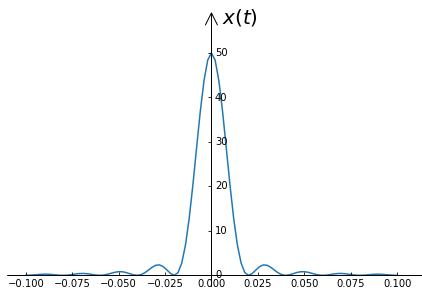

In [8]:
v=np.arange(-0.1,0.1+1e-10,1/500)
v[abs(v)<1e-10]=0
z=[complex(x.subs(t,i).evalf()) for i in v]
Draw()
plt.plot(v,z)
plt.xlim(-0.11,0.11)
plt.title('$x(t)$',fontsize=20,x=0.57,y=1.05)

In [9]:

def take_sample(x,fs):
    v=np.arange(-0.1,0.1+1e-10,1/fs)
    v[abs(v)<1e-10]=0
    z=[complex(x.subs(t,i).evalf()) for i in v]
    Draw()
    plt.stem(v,z)
    #设置为红色线条
    plt.xlim(-0.11,0.11)
    plt.title('$x(t)$   $f_s=%dHz$'%fs,fontsize=15,x=0.7,y=1.05)

d:\Users\zl\anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


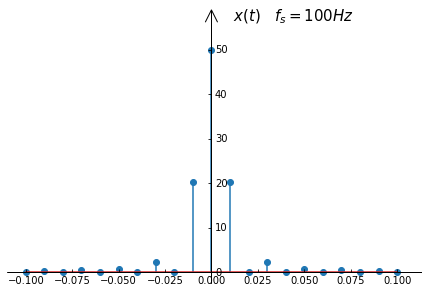

In [10]:
take_sample(x,100)

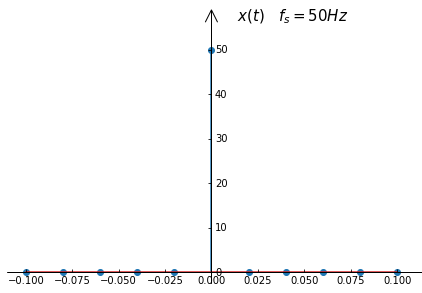

In [11]:
take_sample(x,50)

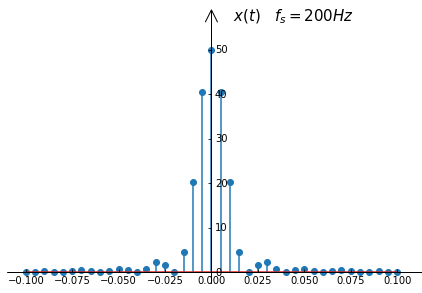

In [12]:
take_sample(x,200)

In [13]:
#离散信号频谱
def X_delta(X,f_s):
    delta=1/f_s
    m=symbols('m')
    f=Symbol('f')
    X_delta=summation(X.subs(f,f+m/delta),(m,-50,50))
    v=np.arange(-300,310,10)
    z=[X_delta.subs(f,i).evalf() for i in v]
    Draw()
    plt.plot(v,z)
    plt.ylim(-0.1,1.1)
    plt.title('$X(f)$   $f_s=%dHz$'%f_s,fontsize=15,x=0.7,y=1.05)

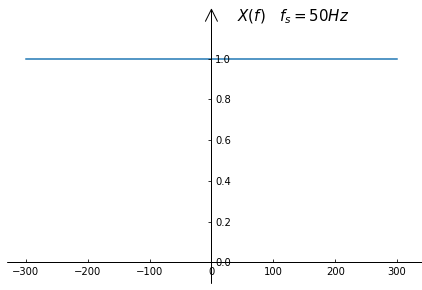

In [14]:
X_delta(X,50)

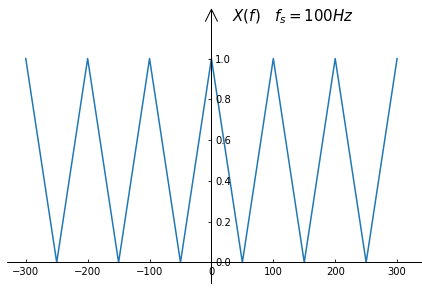

In [15]:
X_delta(X,100)

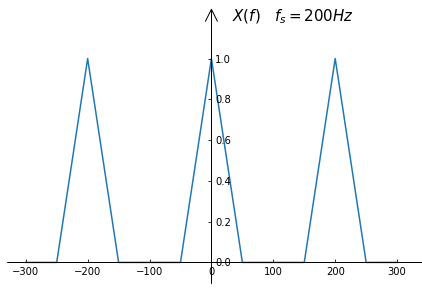

In [16]:
X_delta(X,200)

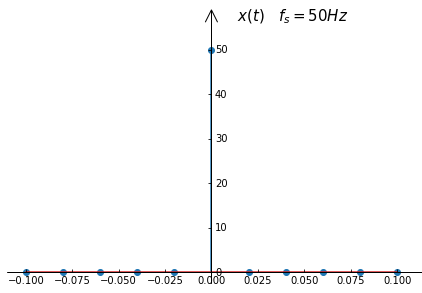

In [17]:
take_sample(x,50)

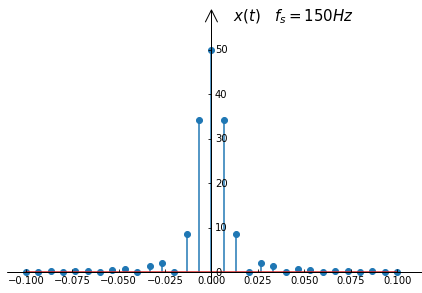

In [18]:
take_sample(x,150)

In [24]:
def x_recovery(x,f_s):
    delta=1/f_s
    Sa=Piecewise((sin(t)/t,abs(t)>delta), (1, True))
    x_recovery=summation(x.subs(t,n*delta)*Sa.subs(t,(t-n*delta)*pi/delta),(n,-20,20))
    v=np.arange(-0.1,0.1+0.002,0.002)
    v[abs(v)<1e-10]=0
    z=[complex(x_recovery.subs(t,i).evalf()) for i in v]
    Draw()
    plt.plot(v,z)
    plt.ylim(-11,50)
    plt.title('$x(t)-recovery$   $f_s=%dHz$'%f_s,fontsize=15,x=0.76,y=1.05)

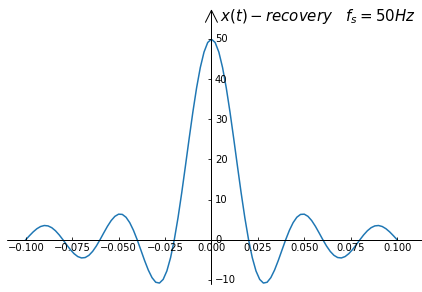

In [25]:
x_recovery(x,50)

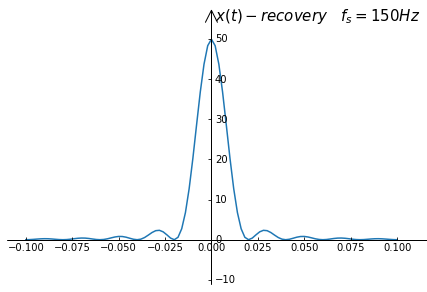

In [26]:
x_recovery(x,150)